In [59]:
# Basic imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('~/Desktop/GL>>/Capstone/Data/heart.csv')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.shape

(303, 14)

## Data contains

#### age - age in years

#### sex - (1 = male; 0 = female)

#### cp - chest pain type   Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

#### trestbps - resting blood pressure (in mm Hg on admission to the hospital)

#### chol - serum cholestoral in mg/dl

#### fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### restecg - resting electrocardiographic results

#### thalach - maximum heart rate achieved

#### exang - exercise induced angina (1 = yes; 0 = no)

#### oldpeak - ST depression induced by exercise relative to rest slope - the slope of the peak exercise ST segment

#### ca - number of major vessels (0-3) colored by flourosopy

#### thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

#### target - have disease or not (1=yes, 0=no)





age: age in years 
sex: sex (1 = male; 0 = female) 
cp: chest pain type 
    -- Value 1: typical angina 
    -- Value 2: atypical angina 
    -- Value 3: non-anginal pain 
    -- Value 4: asymptomatic 
trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
chol: serum cholestoral in mg/dl 
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg: resting electrocardiographic results 
         -- Value 0: normal 
         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
         -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
thalach: maximum heart rate achieved 
exang: exercise induced angina (1 = yes; 0 = no) 
oldpeak = ST depression induced by exercise relative to rest 
slope: the slope of the peak exercise ST segment 
          -- Value 1: upsloping 
          -- Value 2: flat 
          -- Value 3: downsloping 
ca: number of major vessels (0-3) colored by flourosopy 
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
num: diagnosis of heart disease (angiographic disease status) 
        -- Value 0: < 50% diameter narrowing 
        -- Value 1: > 50% diameter narrowing

## Instructions:

1.	Perform the required data pre-processing to treat for missing values and outliers.
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Divide the given data into train and test sets
4.	Predict how presence of heart disease by building classification models
5.	Interpret how each of the X variables influence the conversion propensity
6.	Evaluate the model performance measures and choose the most optimum model
7.	Enlist your key findings based on the most optimum model and the respective feature importance


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

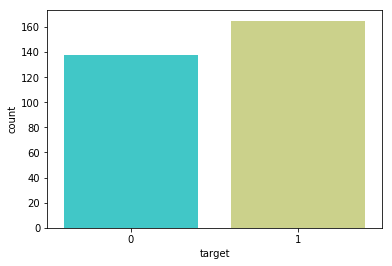

In [32]:
sns.countplot(x='target',data=df,palette='rainbow')
plt.show()

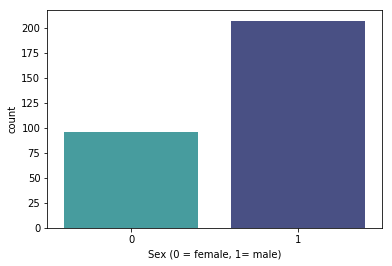

In [29]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

Text(0.5, 0, 'Sex (0 = female, 1= male)')

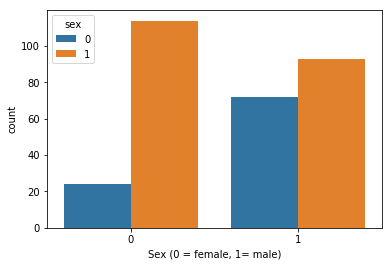

In [33]:
sns.countplot(x='target',hue='sex',data=df)
plt.xlabel("Sex (0 = female, 1= male)")

#sex - (1 = male; 0 = female)

Text(0.5, 0, 'Age Distribution Of Patients')

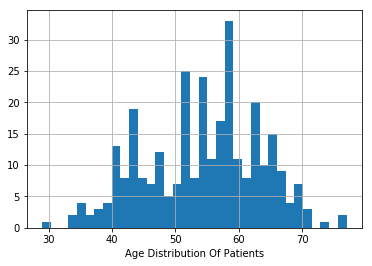

In [36]:
df['age'].hist(bins=35)
plt.xlabel('Age Distribution Of Patients')

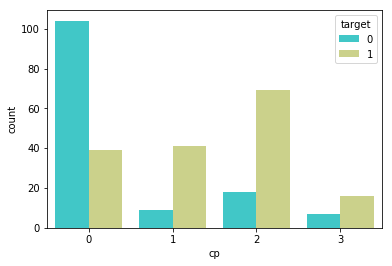

In [37]:
sns.countplot(x='cp',hue='target',data=df,palette='rainbow')

In [38]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
df.sample(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


In [40]:
sex1 = pd.get_dummies(df['sex'],drop_first=True)
cp1 = pd.get_dummies(df['cp'],drop_first=True)
fbs1 = pd.get_dummies(df['fbs'],drop_first=True)
restecg1 = pd.get_dummies(df['restecg'],drop_first=True)
exang1 = pd.get_dummies(df['exang'],drop_first=True)
slope1 = pd.get_dummies(df['slope'],drop_first=True)
ca1 = pd.get_dummies(df['ca'],drop_first=True)
thal1 = pd.get_dummies(df['thal'],drop_first=True)

In [41]:
df.drop(['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal'],axis=1,inplace=True)

In [42]:
df = pd.concat([df,sex1,cp1,fbs1,restecg1,exang1,slope1,cp1,thal1],axis=1)

In [43]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,1,1,2,3,...,2,1,1,2,1,2,3,1,2,3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.3, 
                                                    random_state=123)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [61]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions=lr.predict(X_test)

In [50]:
predictions

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0])

In [51]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))
print('Accuracy score:', accuracy_score(y_test,predictions))
print('Confusion_matrix:', confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        45
           1       0.84      0.80      0.82        46

   micro avg       0.82      0.82      0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Accuracy score: 0.8241758241758241
Confusion_matrix: [[38  7]
 [ 9 37]]


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'C': [1,10,100,1000], 'max_iter': [100,105,110,120]}

In [57]:
grid = GridSearchCV(lr,param_grid,verbose=3)

In [60]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, max_iter=100 ...............................................
[CV] ...... C=1, max_iter=100, score=0.7887323943661971, total=   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...... C=1, max_iter=100, score=0.8450704225352113, total=   0.0s
[CV] C=1, max_iter=100 ...............................................
[CV] ...... C=1, max_iter=100, score=0.8571428571428571, total=   0.0s
[CV] C=1, max_iter=105 ...............................................
[CV] ...... C=1, max_iter=105, score=0.7887323943661971, total=   0.0s
[CV] C=1, max_iter=105 ...............................................
[CV] ...... C=1, max_iter=105, score=0.8450704225352113, total=   0.0s
[CV] C=1, max_iter=105 ...............................................
[CV] ...... C=1, max_iter=105, score=0.8571428571428571, total=   0.0s
[CV] C=1, max_iter=110 ...............................................
[CV] ...... C=1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..... C=10, max_iter=110, score=0.8142857142857143, total=   0.0s
[CV] C=10, max_iter=120 ..............................................
[CV] ..... C=10, max_iter=120, score=0.7746478873239436, total=   0.0s
[CV] C=10, max_iter=120 ..............................................
[CV] ..... C=10, max_iter=120, score=0.8732394366197183, total=   0.0s
[CV] C=10, max_iter=120 ..............................................
[CV] ..... C=10, max_iter=120, score=0.8142857142857143, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] .... C=100, max_iter=100, score=0.7605633802816901, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] .... C=100, max_iter=100, score=0.8732394366197183, total=   0.0s
[CV] C=100, max_iter=100 .............................................
[CV] .... C=100, max_iter=100, score=0.7857142857142857, total=   0.0s
[CV] C=100, max_iter=105 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'max_iter': [100, 105, 110, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [62]:
grid.best_params_

{'C': 1, 'max_iter': 100}

In [63]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
grid_predictions = grid.predict(X_test)

In [65]:
print(confusion_matrix(y_test,grid_predictions))

[[38  7]
 [ 9 37]]


In [66]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        45
           1       0.84      0.80      0.82        46

   micro avg       0.82      0.82      0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

